# 복습

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
plt.rc("font", family = "Gulim")
plt.rc("axes", unicode_minus = False)

In [186]:
from sklearn.linear_model import LinearRegression

In [187]:
mtcars = pd.read_excel("../../dataset/mtcars.xlsx")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [188]:
train_X = mtcars.loc[:, "cyl":"qsec"]
train_y = mtcars.loc[:, "mpg"]
train_y.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [189]:
lr = LinearRegression()
lr.fit(train_X, train_y)

LinearRegression()

In [190]:
print("Train R-square = ", round(lr.score(train_X, train_y), 3))

Train R-square =  0.855


In [191]:
# lr.coef_
# train_X.columns

df_coeff = pd.DataFrame(lr.coef_, train_X.columns, columns=["coefficient"])
df_coeff

,coefficient
cyl,-0.818560
disp,0.013205
hp,-0.017930
drat,1.320406
wt,-4.190832
qsec,0.401461


# KNN(k-nearest neigbors classifier) 최근접이웃

In [192]:
# 도미자료
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 방어자료
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [193]:
## string interpolation
print("도미 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(bream_weight), np.mean(bream_length)))
print("방어 무게 = {:.4f}, 길이 = {:.4f}".format(np.mean(smelt_weight), np.mean(smelt_length)))

도미 무게 = 617.8286, 길이 = 33.1086
방어 무게 = 11.1786, 길이 = 11.9214


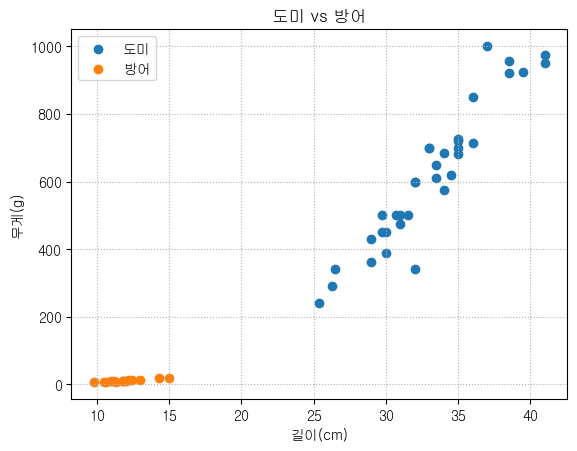

In [194]:
## Scatter plot
plt.scatter(bream_length, bream_weight, label = "도미")
plt.scatter(smelt_length, smelt_weight, label = "방어")
plt.title("도미 vs 방어")
plt.xlabel("길이(cm)")
plt.ylabel("무게(g)")
plt.grid(linestyle = ":")
plt.legend()
plt.show()

In [195]:
## list 1개로 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(np.shape(length))
print(np.shape(weight))

## x_2d로 만들기
fish_data = np.column_stack([length, weight])
print(fish_data)

(49,)
(49,)
[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [196]:
## 
fish_target = np.append(np.ones(len(bream_length)), np.zeros(len(smelt_length)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [197]:
## knn class
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn = KNeighborsClassifier(n_neighbors = 5
                           , weights = "uniform"
                           , metric = "minkowski"
                           , p = 2)
# 하이퍼파라미터 튜닝 k와 거리
## weights 거리에 대한 부분 고려 = uniform 생각하지 않겠다
### weights는 k개의 인접 군집을 확인해보았을때, 1:1, 2:2 등으로 동일한 비율로 나왔을때 거리를 기준으로 예측하겠다는 의미.(so, k는 보통 홀수로 잡는 편)
## 민코스키 거리의 p값을 2로 설정하여 "유클리디안"사용
knn.fit(fish_data, fish_target)
print("Train ACC = ", knn.score(fish_data, fish_target))

Train ACC =  1.0


In [199]:
## Attribute
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes =  [0. 1.]
metrics =  euclidean
samples =  49


In [200]:
## 새로운 data 넣어보기
new_data01 = [[40, 700]]
new_data02 = [[16, 20]]

print(knn.predict(new_data01))
print(knn.predict(new_data02))

[1.]
[0.]


In [201]:
def predict_categories(result):
    if result == 1:
        return "도미"
    elif result == 0:
        return "방어"

In [202]:
result01 = knn.predict(new_data01)
result02 = knn.predict(new_data02)

print("result01 = ", predict_categories(result01))
print("result02 = ", predict_categories(result02))

result01 =  도미
result02 =  방어


## data split 진행 후 다시 해보기

In [203]:
## data split
idx = np.arange(49)
np.random.shuffle(idx)

print(idx)

[47 22 40 43 25 18 32  5 20 46  6  2 34 15 10 31 29 35 33 41 37 14 27  8
 28 16 12 48 11  7  1  9 21 38 13  0 23 19 44 39 45 17 36 42 24  4 26  3
 30]


In [204]:
train_X = fish_data[idx[:35]]
train_y = fish_target[idx[:35]]

test_X = fish_data[idx[35:]]
test_y = fish_target[idx[35:]]

print(np.column_stack((train_X, train_y)))
print(np.column_stack((test_X, test_y)))

[[  14.3   19.7    0. ]
 [  34.5  620.     1. ]
 [  11.3    8.7    0. ]
 [  12.     9.8    0. ]
 [  35.   725.     1. ]
 [  33.5  610.     1. ]
 [  39.5  925.     1. ]
 [  29.7  450.     1. ]
 [  34.   575.     1. ]
 [  13.    12.2    0. ]
 [  29.7  500.     1. ]
 [  26.5  340.     1. ]
 [  41.   950.     1. ]
 [  32.   600.     1. ]
 [  31.   475.     1. ]
 [  38.5  955.     1. ]
 [  37.  1000.     1. ]
 [   9.8    6.7    0. ]
 [  41.   975.     1. ]
 [  11.8   10.     0. ]
 [  10.6    7.     0. ]
 [  32.   600.     1. ]
 [  36.   714.     1. ]
 [  30.   450.     1. ]
 [  36.   850.     1. ]
 [  33.   700.     1. ]
 [  31.5  500.     1. ]
 [  15.    19.9    0. ]
 [  31.   500.     1. ]
 [  30.   390.     1. ]
 [  26.3  290.     1. ]
 [  30.7  500.     1. ]
 [  34.   685.     1. ]
 [  11.     9.7    0. ]
 [  32.   340.     1. ]]
[[ 25.4 242.    1. ]
 [ 35.  680.    1. ]
 [ 33.5 650.    1. ]
 [ 12.2  12.2   0. ]
 [ 11.2   9.8   0. ]
 [ 12.4  13.4   0. ]
 [ 33.  700.    1. ]
 [ 10.5   7.

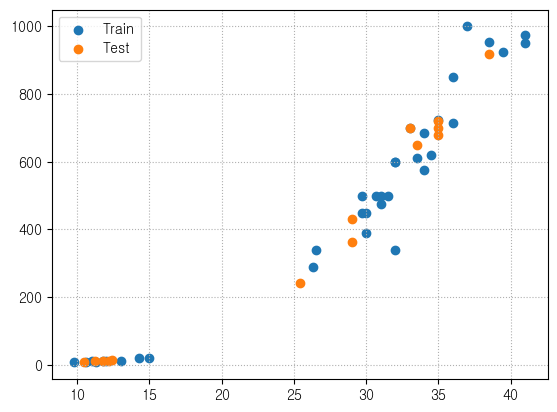

In [205]:
plt.scatter(train_X[:, 0], train_X[:, 1], label = "Train")
plt.scatter(test_X[:, 0], test_X[:, 1], label = "Test")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [206]:
knn = KNeighborsClassifier(n_neighbors = 5
                           , weights = "uniform"
                           , metric = "minkowski"
                           , p = 2
                           )

knn.fit(train_X, train_y)
print("Test ACC = ", knn.score(test_X, test_y))

Test ACC =  1.0


In [207]:
print("classes = ", knn.classes_)
print("metrics = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)

classes =  [0. 1.]
metrics =  euclidean
samples =  35


In [208]:
## test split library
from sklearn.model_selection import train_test_split

In [209]:
train_X, test_X, train_y, test_y = train_test_split(
    fish_data, fish_target, stratify = fish_target
    )

print(train_X)

[[  29.   363. ]
 [  26.5  340. ]
 [  11.8   10. ]
 [  35.   720. ]
 [  32.   600. ]
 [  35.   700. ]
 [  34.5  620. ]
 [  25.4  242. ]
 [  12.2   12.2]
 [  38.5  920. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  32.   600. ]
 [  38.5  955. ]
 [  12.     9.8]
 [  31.   475. ]
 [   9.8    6.7]
 [  34.   685. ]
 [  11.3    8.7]
 [  31.   500. ]
 [  32.   340. ]
 [  33.   700. ]
 [  41.   950. ]
 [  29.   430. ]
 [  29.7  500. ]
 [  29.7  450. ]
 [  39.5  925. ]
 [  31.5  500. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  15.    19.9]
 [  35.   725. ]
 [  11.2    9.8]
 [  11.     9.7]
 [  14.3   19.7]
 [  12.4   13.4]]


In [210]:
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
knn.score(test_X, test_y)

1.0

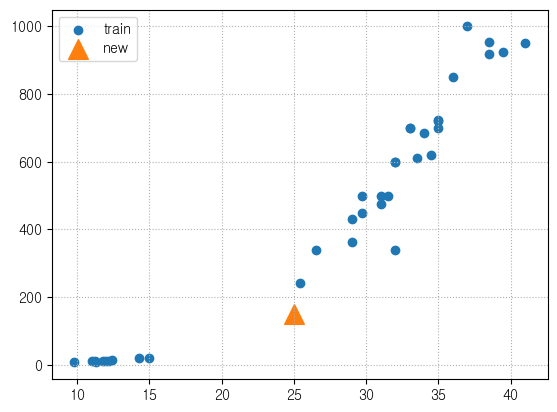

In [211]:
##
plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")

plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [212]:
knn.predict([[25, 150]])

array([0.])

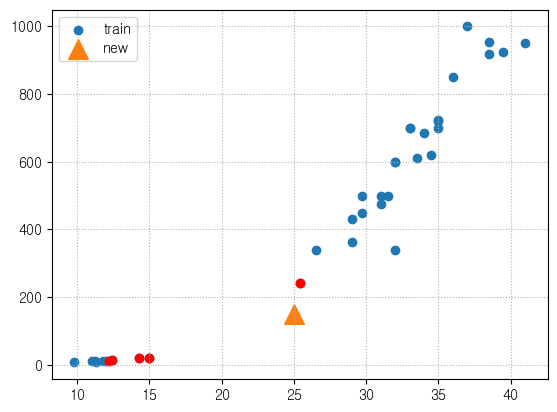

In [213]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "r")
plt.legend()
plt.grid(linestyle = ":")
plt.show()

#### 표준화의 필요성
두 변수의 단위를 표준화시키지 않아서 예측이 생각한 것과 다르게 나옴
표준화를 진행해줘야 함

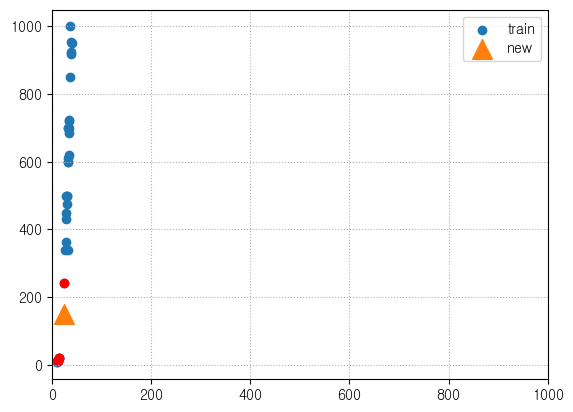

In [214]:
distance, index = knn.kneighbors([[25, 150]])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "r")
plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [215]:
## 표준화
mean = np.mean(train_X, axis = 0)
std = np.std(train_X, axis = 0)

train_scaled = (train_X - mean)/std
train_scaled

array([[ 0.16861479, -0.29116526],
       [-0.08139066, -0.36100646],
       [-1.55142271, -1.36307585],
       [ 0.76862787,  0.79289162],
       [ 0.46862133,  0.42850275],
       [ 0.76862787,  0.73216014],
       [ 0.71862678,  0.48923423],
       [-0.19139306, -0.6585907 ],
       [-1.51142183, -1.35639539],
       [ 1.1186355 ,  1.4002064 ],
       [ 0.56862351,  0.73216014],
       [ 0.6186246 ,  0.45886849],
       [ 0.46862133,  0.42850275],
       [ 1.1186355 ,  1.50648649],
       [-1.53142227, -1.36368316],
       [ 0.36861915,  0.04893101],
       [-1.75142707, -1.37309654],
       [ 0.66862569,  0.68661153],
       [-1.6014238 , -1.36702339],
       [ 0.36861915,  0.12484536],
       [ 0.46862133, -0.36100646],
       [ 0.56862351,  0.73216014],
       [ 1.36864094,  1.49130362],
       [ 0.16861479, -0.08771481],
       [ 0.23861631,  0.12484536],
       [ 0.23861631, -0.02698333],
       [ 1.21863768,  1.41538927],
       [ 0.41862024,  0.12484536],
       [ 0.86863005,

In [216]:
## 표준화된 새로운 데이터 만들기
new = ([25, 150] - mean) / std

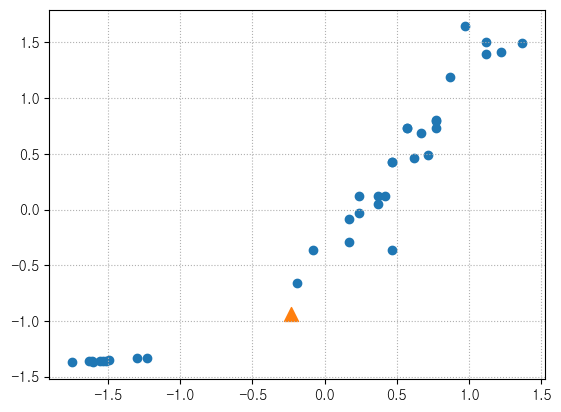

In [217]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker= "^", s = 100)
plt.grid(linestyle = ":")
plt.show()

In [218]:
test_scaled = (test_X - mean) / std

knn.fit(train_scaled, train_y)
print("Test ACC = ", knn.score(test_scaled, test_y))
print("Prediction = ", knn.predict([new]))

Test ACC =  1.0
Prediction =  [1.]


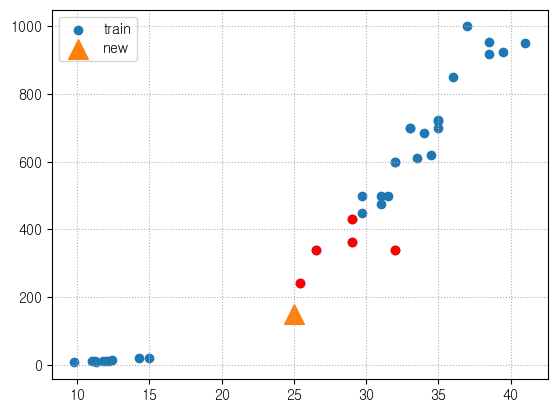

In [219]:
distance, index = knn.kneighbors([new])

plt.scatter(train_X[:, 0], train_X[:, 1], label = "train")
plt.scatter(25, 150, marker = "^", s = 200, label = "new")
plt.scatter(train_X[index, 0], train_X[index, 1], c = "r")
# plt.xlim(0, 1000)
plt.legend()
plt.grid(linestyle = ":")
plt.show()

In [220]:
## GridSearch
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0 : 
        knn.n_neighbors = n
        knn.fit(train_scaled, train_y)
        score = knn.score(test_scaled, test_y)
        score_list.append(score)
        n_list.append(n)


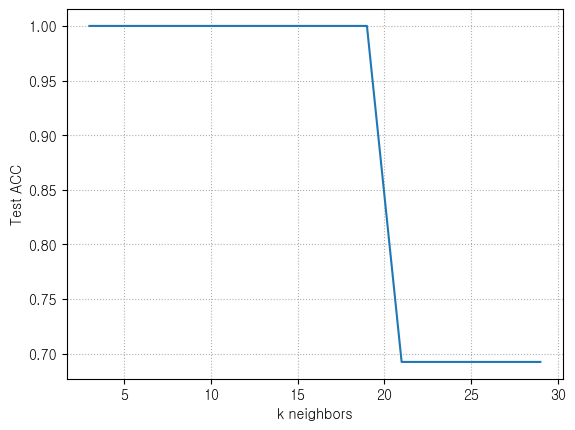

In [221]:
plt.plot(n_list, score_list)
plt.xlabel("k neighbors")
plt.ylabel("Test ACC")
plt.grid(linestyle = ":")
plt.show()

# quest - KNN을 이용하여 Seaborn iris 자료 분류

## dataset load하기

In [254]:
df_iris = sns.load_dataset("iris")
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## data 살펴보기

In [253]:
## Summary statistic
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(close=None, block=None)>

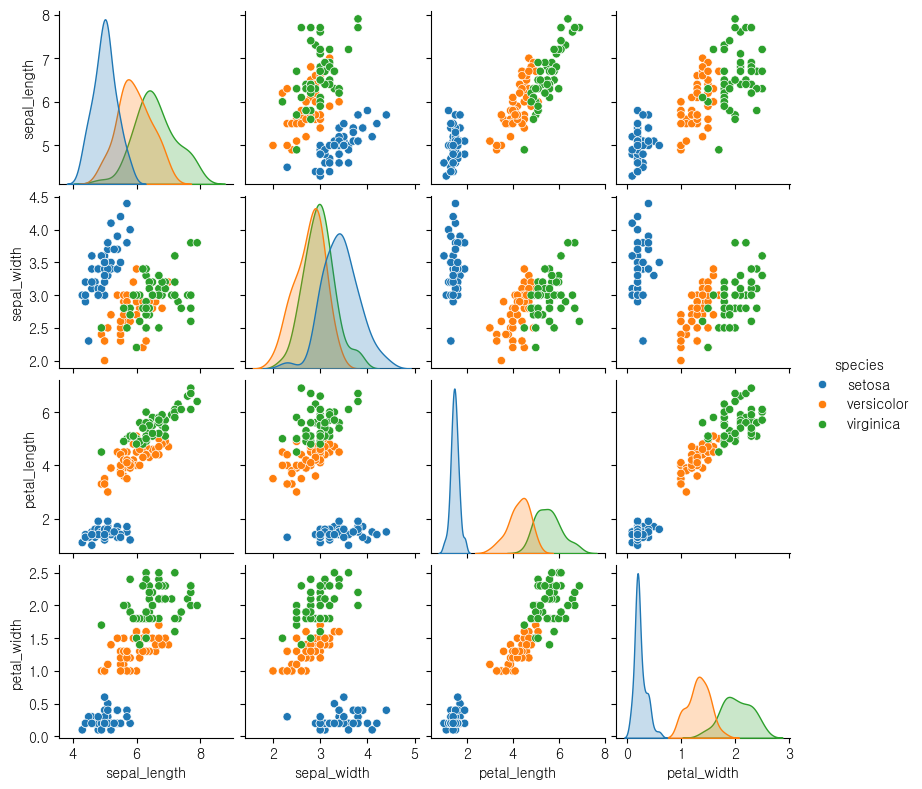

In [237]:
# Visualization
sns.pairplot(df_iris, hue="species", height = 2)
plt.show

## Feature와 Target 분리

In [238]:
df_iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [255]:
X = df_iris.drop(columns='species')  # 특성 값들 (sepal_length, sepal_width, petal_length, petal_width)
y = df_iris['species']               # 타겟 값 (species)

## Test data 분리하기

In [256]:
## test split library
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(X_train.shape)

(105, 4)


## 표준화하기

In [258]:

## 표준화
mean = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

train_scaled = (X_train - mean)/std
test_scaled = (X_test - mean) / std

## 모델 학습 시키기

In [259]:
knn = KNeighborsClassifier(n_neighbors = 5
                           , weights = "uniform"
                           , metric = "minkowski"
                           , p = 2
                           )
knn.fit(train_scaled, y_train)

KNeighborsClassifier()

## 모델 평가

In [260]:
print("train ACC = ", knn.score(train_scaled, y_train))
print("test ACC = ", knn.score(test_scaled, y_test))

train ACC =  0.9428571428571428
test ACC =  1.0


In [265]:
##
print("classes = ", knn.classes_)
print("feature name = ", knn.feature_names_in_)
print("metric = ", knn.effective_metric_)
print("samples = ", knn.n_samples_fit_)
print("k = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
feature name =  ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']
metric =  euclidean
samples =  105
k =  29


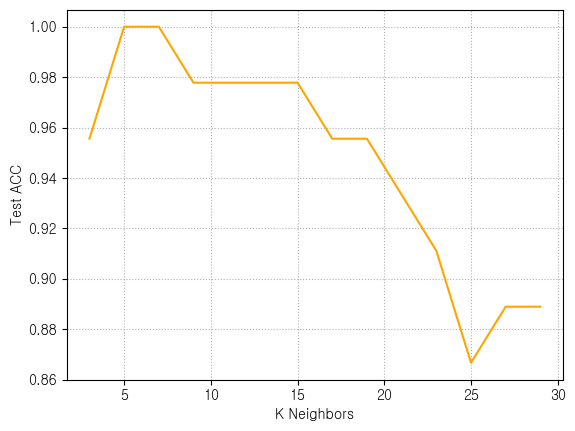

In [262]:
knn = KNeighborsClassifier()

score_list = []
n_list = []

for n in range(3, 30):
    if n % 2 != 0:
        knn.n_neighbors = n
        knn.fit(train_scaled, y_train)
        score = knn.score(test_scaled, y_test)
        score_list.append(score)
        n_list.append(n)
        
plt.plot(n_list, score_list, c = "orange")
plt.grid(linestyle = ":")
plt.xlabel("K Neighbors")
plt.ylabel("Test ACC")
plt.show()